## Clustering 

In [111]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
new_df = pd.read_csv("final_df3.csv")

In [113]:
new_df= new_df.drop(columns="Unnamed: 0")
new_df

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sargeant,2000-12-31,American,Logan Sargeant
9596,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,zhou,1999-05-30,Chinese,Guanyu Zhou
9597,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sainz,1994-09-01,Spanish,Carlos Sainz
9598,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,bottas,1989-08-28,Finnish,Valtteri Bottas


In [114]:
new_df.head(), new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_number      9600 non-null   int64  
 1   position           9600 non-null   int64  
 2   points             9600 non-null   float64
 3   grid               9600 non-null   int64  
 4   laps               9600 non-null   int64  
 5   status             9600 non-null   object 
 6   driver_id          9600 non-null   object 
 7   constructor_id     9600 non-null   object 
 8   fastest_lap_rank   9600 non-null   int64  
 9   fastest_lap        9600 non-null   int64  
 10  fastest_lap_time   9600 non-null   int64  
 11  fastest_lap_speed  9600 non-null   int64  
 12  raceName           9600 non-null   object 
 13  date               9600 non-null   object 
 14  season             9600 non-null   int64  
 15  driverId           9600 non-null   object 
 16  dateOfBirth        9600 

(   driver_number  position  points  grid  laps    status           driver_id  \
 0              3         1    10.0     3    58  Finished  michael_schumacher   
 1              4         2     6.0     4    58  Finished         barrichello   
 2              9         3     4.0    11    58  Finished     ralf_schumacher   
 3             22         4     3.0     8    58  Finished          villeneuve   
 4             11         5     2.0     9    58  Finished          fisichella   
 
   constructor_id  fastest_lap_rank  fastest_lap  fastest_lap_time  \
 0        ferrari                 1            1                 1   
 1        ferrari                 1            1                 1   
 2       williams                 1            1                 1   
 3            bar                 1            1                 1   
 4       benetton                 1            1                 1   
 
    fastest_lap_speed               raceName        date  season  \
 0                  1 

## Data Preprocessing Step

In [115]:
# Encoding categorical variables
label_encoders = {}
for column in new_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])

In [116]:
#Correlation Matrix
corr_matrix = new_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 (you can choose a different threshold)
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print high correlation pairs and features to remove
print("Highly correlated features (above threshold):", high_corr)

# Drop features 
relevant_features = new_df.drop(columns=high_corr)
relevant_features

Highly correlated features (above threshold): ['fastest_lap', 'fastest_lap_time', 'fastest_lap_speed', 'season', 'driverId', 'dateOfBirth']


,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,raceName,date,nationality,driverFullName
0,3,1,10.0,3,58,45,73,10,1,2,0,15,71
1,4,2,6.0,4,58,45,8,10,1,2,0,5,102
2,9,3,4.0,11,58,45,92,36,1,2,0,15,94
3,22,4,3.0,8,58,45,114,5,1,2,0,7,39
4,11,5,2.0,9,58,45,29,6,1,2,0,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2,16,0.0,20,58,45,101,36,0,1,454,0,61
9596,24,17,0.0,19,58,45,121,0,0,1,454,8,35
9597,55,18,0.0,16,57,79,99,10,0,1,454,29,12
9598,77,19,0.0,18,57,0,11,0,0,1,454,13,116


In [117]:
#Scaling the relevant features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(relevant_features)
data_scaled

array([[-0.83594199, -1.63629498,  1.05287329, ..., -1.72620326,
         0.08240581,  0.32219775],
       [-0.78134652, -1.47426887,  0.39411984, ..., -1.72620326,
        -1.10918292,  1.24082251],
       [-0.50836915, -1.31224275,  0.06474311, ..., -1.72620326,
         0.08240581,  1.00375806],
       ...,
       [ 2.00302258,  1.11814897, -0.59401034, ...,  1.7698315 ,
         1.75063002, -1.42615258],
       [ 3.20412298,  1.28017509, -0.59401034, ...,  1.7698315 ,
        -0.15591194,  1.6556853 ],
       [ 0.09218104,  1.4422012 , -0.59401034, ...,  1.7698315 ,
        -0.39422968, -0.15193115]])

## Elbow Method

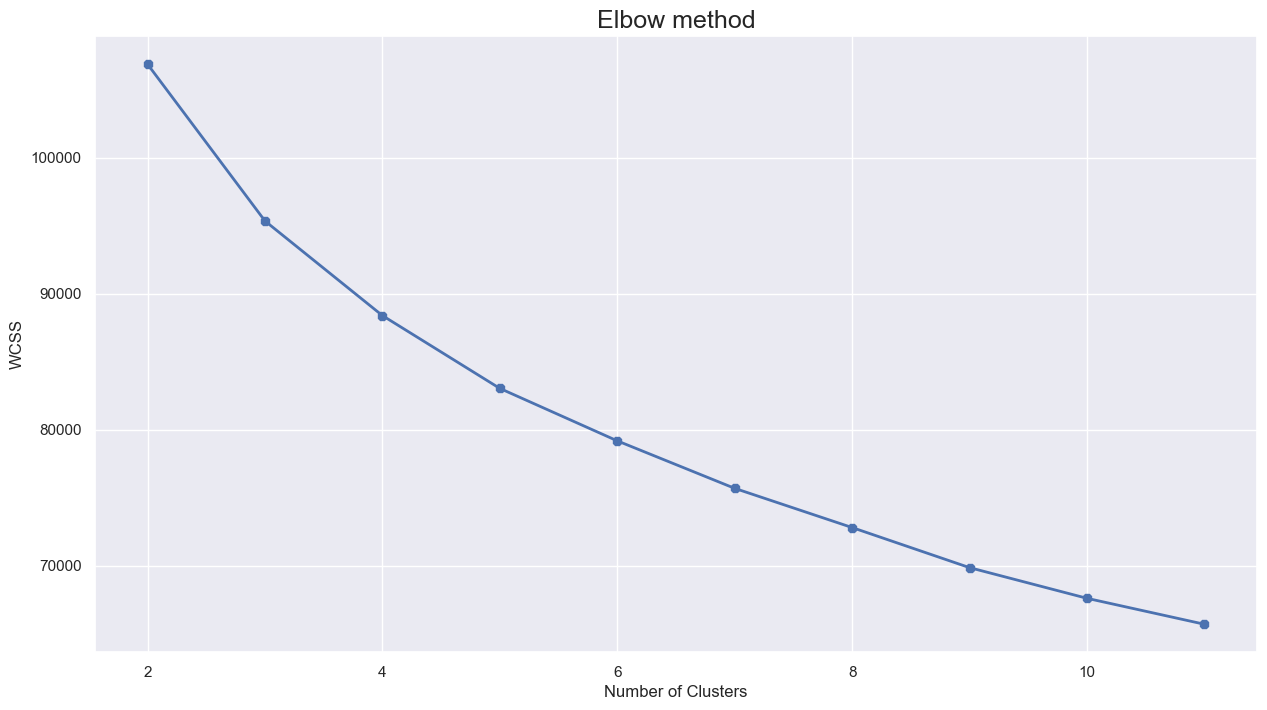

In [118]:
x_input = data_scaled
wcss = []
for k in range(2, 12):
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)

plt.figure(figsize=(15,8))

plt.plot(range(2, 12), wcss, linewidth=2, marker='8')
plt.title('Elbow method', fontsize=18)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.1367544308778719
For n_clusters = 3, the average silhouette_score is : 0.1527704465472228
For n_clusters = 4, the average silhouette_score is : 0.1551879139784025
For n_clusters = 5, the average silhouette_score is : 0.15759562316720524
For n_clusters = 6, the average silhouette_score is : 0.1229723569100125
For n_clusters = 7, the average silhouette_score is : 0.126538515587753
For n_clusters = 8, the average silhouette_score is : 0.11732808851545111
For n_clusters = 9, the average silhouette_score is : 0.12511490939903133
For n_clusters = 10, the average silhouette_score is : 0.12277172416516911


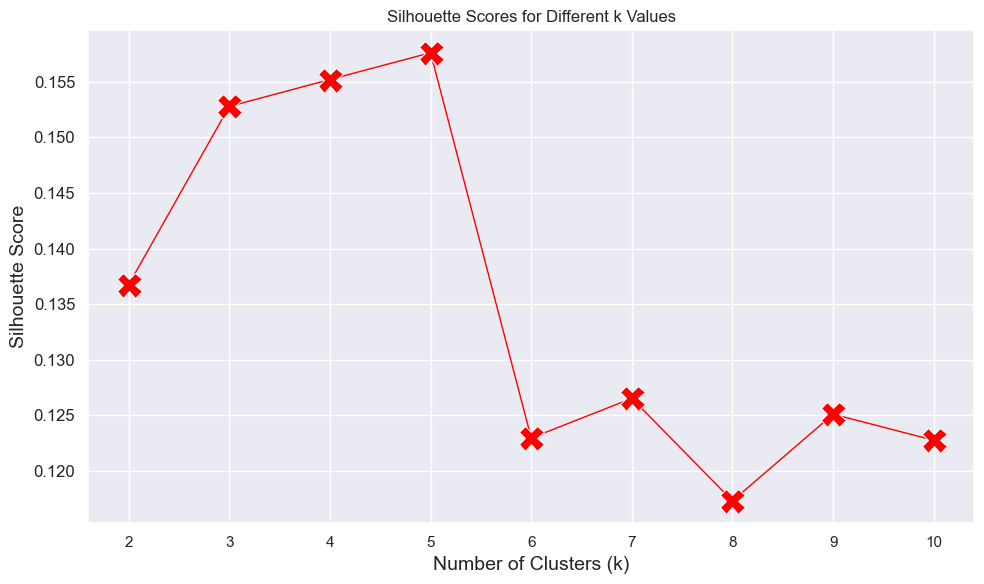

In [119]:


# Assuming data_scaled is your scaled dataset
range_n_clusters = list(range(2, 11))  # Usually start with 2 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores using Seaborn
sns.set()  # Set the default Seaborn style
plt.figure(figsize=(10, 6))
sns.lineplot(x=range_n_clusters, y=silhouette_scores, marker='X',markersize=18, color='red', linewidth=1)
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(range_n_clusters)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [120]:
# K-means clustering with different values of k
k_values = [3, 4, 5]
kmeans_results = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    kmeans_results[k] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_
    }

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [121]:
kmeans_results

{3: {'labels': array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
  'centroids': array([[-0.26121231,  0.34948393, -0.44779604,  0.06833994, -0.74765845,
           0.08629475, -0.00284226, -0.10368058,  2.05197857,  0.01097116,
          -1.1301598 , -0.18539939, -0.12468678],
         [ 0.12560108,  0.5018371 , -0.52310421,  0.47688297,  0.0169742 ,
          -0.2950239 , -0.0108877 ,  0.1136079 , -0.47956312, -0.00792722,
           0.22386956,  0.11904271,  0.02658074],
         [-0.05989103, -1.12164081,  1.22205957, -0.89881184,  0.44307417,
           0.47461914,  0.02133269, -0.13814722, -0.43927359,  0.00727292,
           0.31415885, -0.09614106,  0.03128387]])},
 4: {'labels': array([1, 1, 1, ..., 3, 3, 3], dtype=int32),
  'centroids': array([[-0.06909042,  1.31127415, -0.5909547 ,  0.20549399, -1.88036323,
           0.79924652,  0.01711989,  0.05453645,  0.67894285, -0.01404986,
          -0.29091161,  0.01424968, -0.04369371],
         [-0.38501453, -0.38301479, -0.29705616, -0

In [125]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_scaled)
    
# Finding centroids in the original feature space
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Outputing the centroids of each cluster
centroids


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[7.21773050e+01, 1.07872340e+01, 4.54751773e+00, 1.04397163e+01,
        5.59304965e+01, 2.99673759e+01, 6.28836879e+01, 2.12113475e+01,
        1.56028369e-02, 1.79361702e+01, 3.63885106e+02, 1.66553191e+01,
        6.00212766e+01],
       [1.52141901e+01, 1.92048193e+01, 1.94109772e-02, 1.22161981e+01,
        1.52737617e+01, 5.17951807e+01, 6.32496653e+01, 2.11231593e+01,
        4.75234270e-01, 1.70207497e+01, 1.79163989e+02, 1.43989290e+01,
        5.83018742e+01],
       [1.25176707e+01, 4.20522088e+00, 1.09805221e+01, 5.36425703e+00,
        6.01028112e+01, 4.44803213e+01, 6.52995984e+01, 1.89530120e+01,
        4.01606426e-04, 1.71036145e+01, 2.58228514e+02, 1.31915663e+01,
        5.96024096e+01],
       [1.12124884e+01, 8.63094129e+00, 1.82665424e+00, 1.05927307e+01,
        5.92749301e+01, 2.76439888e+01, 6.21183597e+01, 1.92385834e+01,
        1.00000000e+00, 1.76495806e+01, 3.34426841e+01, 1.19524697e+01,
        5.54240447e+01],
       [1.53663366e+01, 1.31633663e+

In [126]:
# Silhouette analysis to find the best k
silhouette_scores = []
for k, result in kmeans_results.items():
    silhouette_avg = silhouette_score(data_scaled, result['labels'])
    silhouette_scores.append(silhouette_avg)

best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k according to silhouette analysis: {best_k}")

Best k according to silhouette analysis: 5


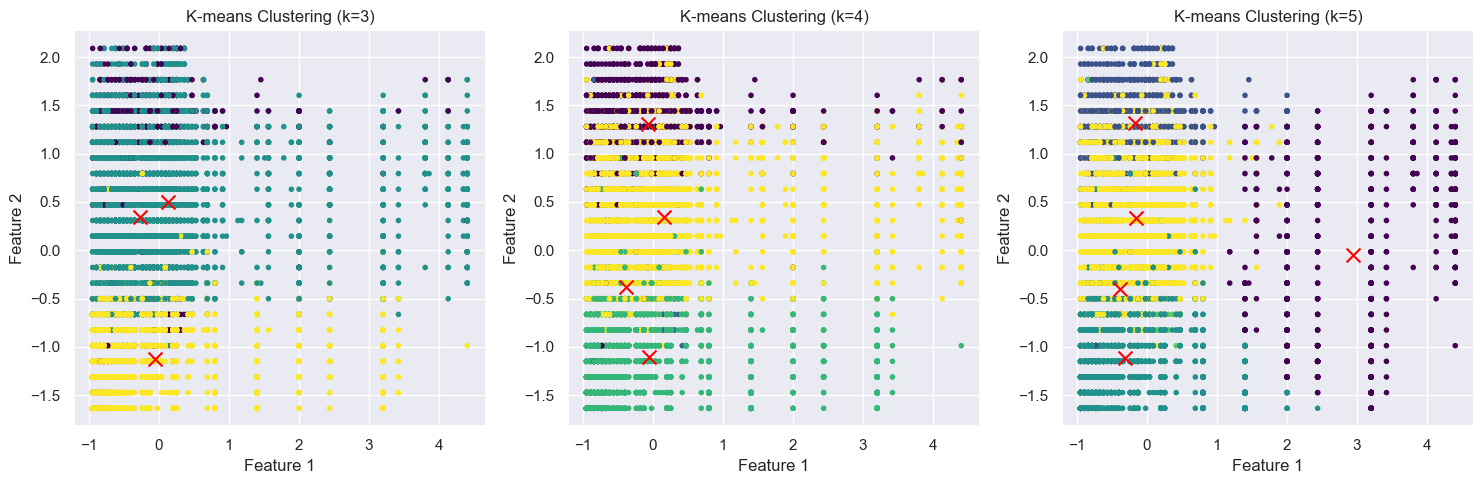

In [127]:
# Visualize K-means clustering results
plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values, 1):
    plt.subplot(1, len(k_values), i)
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_results[k]['labels'], cmap='viridis', marker='.')
    plt.scatter(kmeans_results[k]['centroids'][:, 0], kmeans_results[k]['centroids'][:, 1], marker='x', s=100, color='red')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

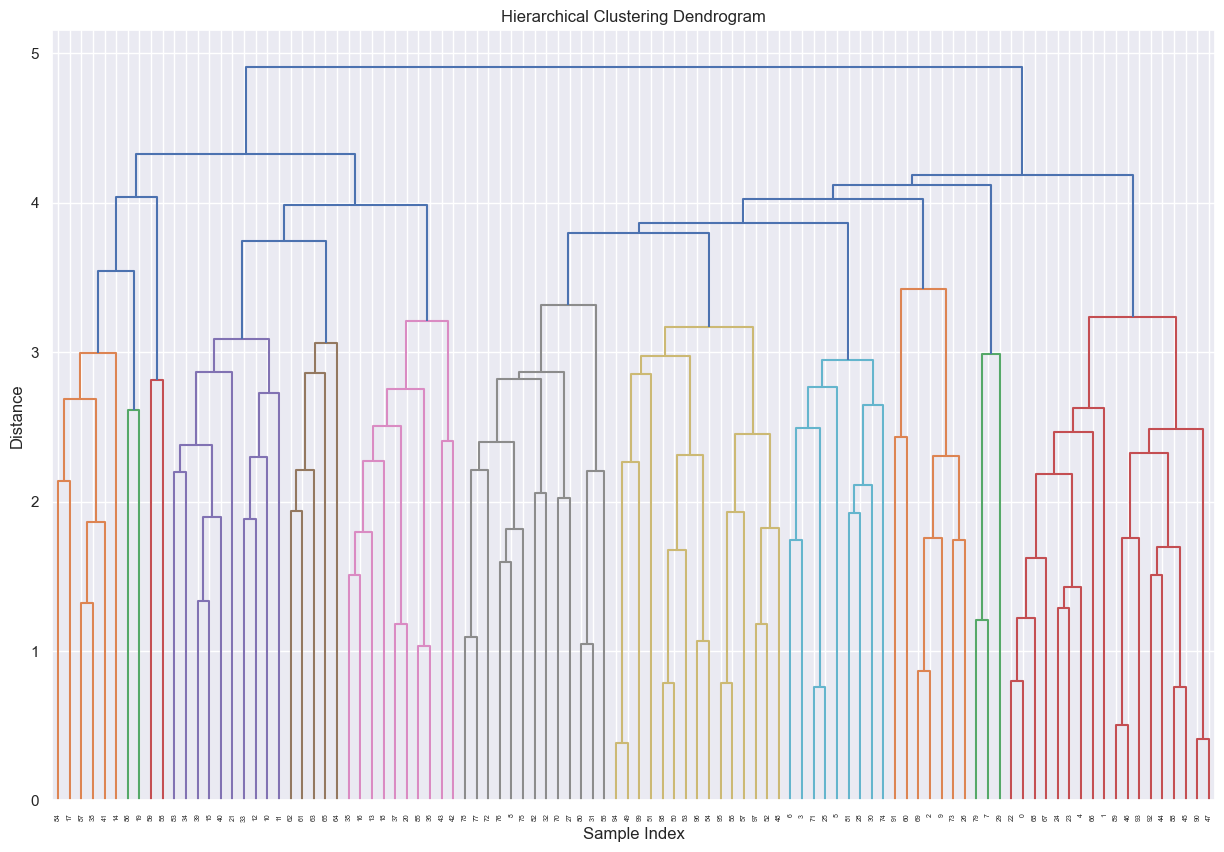

In [131]:
sample_size = 100
X_sampled = data_scaled[:sample_size, :]

# Performing hierarchical clustering on the sampled data
linked_sampled = linkage(X_sampled, method='average')

# Plotting the dendrogram for the sampled data
plt.figure(figsize=(15, 10))
dendrogram(linked_sampled, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()